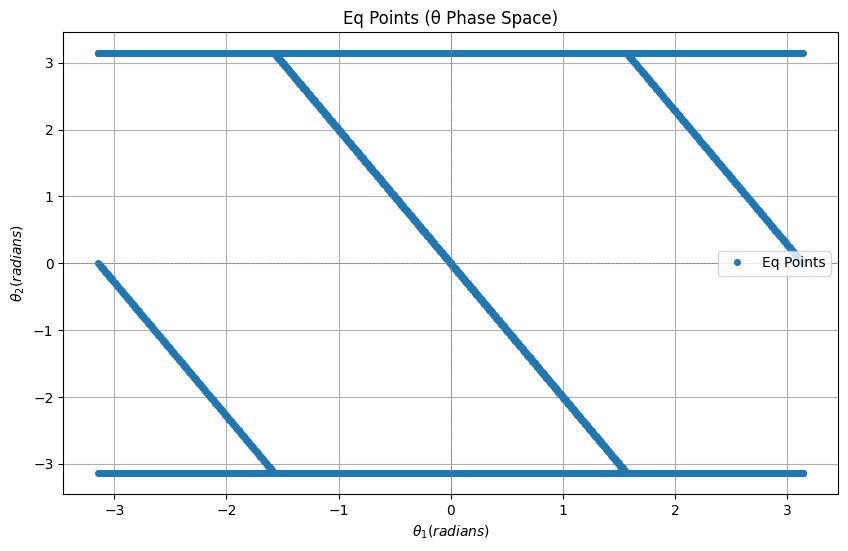

In [ ]:
# Part B
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
l1 = 0.5
l2 = 1
m1 = 8
m2 = 8
g = 10
d = g * m1 * l1 + g * m2 * l1
e = g * m2 * l2

# range of tau values that yield a result for theta1 and theta2
angle_vals = np.pi * np.linspace(-1, 1, 1001)
tau_vals = []

theta1_vals = []
theta2_vals = []

# Compute eq points
for angle in angle_vals:
    # Calculate theta1 and theta2
    theta1 = angle
    tau = d * np.sin(theta1)
    theta2 = np.arcsin(-tau/e) - theta1

    theta1_vals.append(theta1)
    theta2_vals.append(theta2)
    tau_vals.append(tau)

    theta1_vals.append(-theta1)
    theta2_vals.append(-theta2)
    tau_vals.append(tau)

    theta2 = np.arcsin(tau/e) - theta1 - np.pi
    if theta2 <= np.pi and theta2 >= -np.pi:
      theta1_vals.append(theta1)
      theta2_vals.append(theta2)
      tau_vals.append(tau)

      theta1_vals.append(-theta1)
      theta2_vals.append(-theta2)
      tau_vals.append(tau)

    # at this point the center of mass will be on the pivot joint
    theta1_vals.append(theta1)
    theta2_vals.append(-np.pi)
    tau_vals.append(tau)

    theta1_vals.append(-theta1)
    theta2_vals.append(np.pi)
    tau_vals.append(tau)


# Convert lists to numpy arrays
theta1_eq = np.array(theta1_vals)
theta2_eq = np.array(theta2_vals)

# Plot theta phase plane
plt.figure(figsize=(10, 6))
plt.plot(theta1_eq, theta2_eq, 'o', markersize=4, label='Eq Points')
plt.title('Eq Points (θ Phase Space)')
plt.xlabel("$θ_{1} (radians)$")
plt.ylabel("$θ_{2} (radians)$")
plt.axhline(0, color='gray', lw=0.5, linestyle='--')
plt.axvline(0, color='gray', lw=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Part C
import sympy as sp

# Setup variables
# Note: x1=theta1, x2=theta2, x3=dtheta1, and x4 = dtheta4
theta1, theta2, dtheta1, dtheta2 = sp.symbols('theta1 theta2 dtheta1 dtheta2')

# Other parameter values
a = m1 * l1**2 + m2 * l1**2
b = m2 * l2**2
c = m2 * l1 * l2

# setup up the matrices
M = sp.Matrix([[a + b + 2*c*sp.cos(theta2), b + c*sp.cos(theta2)],
               [b + c*sp.cos(theta2), b]])

C = sp.Matrix([[-c*sp.sin(theta2)*dtheta2, -c*sp.sin(theta2)*(dtheta1 + dtheta2)],
               [c*sp.sin(theta2)*dtheta1, 0]])

G = sp.Matrix([[-d*sp.sin(theta1) - e*sp.sin(theta1 + theta2)],
               [-e*sp.sin(theta1 + theta2)]])

dtheta = sp.Matrix([dtheta1, dtheta2])

# We define f_x = f(x)
f_x = M.inv() * (-G - C * dtheta)
f_x = f_x.row_insert(0, sp.Matrix([[dtheta2]]))
f_x = f_x.row_insert(0, sp.Matrix([[dtheta1]]))

# Compute the Jacobian of f_x with respect to the variables we set up
x = sp.Matrix([theta1, theta2, dtheta1, dtheta2])
J_f = f_x.jacobian(x)
J_f.simplify()

In [ ]:
# now we evaluate at (0, 0). Note at equilibrium we also have dtheta1=dtheta2=0
point = {'theta1' : 0, 'theta2': 0, 'dtheta1':0, 'dtheta2': 0}
J_eval = J_f.subs(point)
#print("J_eval = {}".format(J_eval))

# now we find g(x) at x=x_0 = (0,0,0,0)
control = sp.Matrix([0, 1])
g_x = M.inv() * control
g_x = g_x.row_insert(0, sp.Matrix([[0]]))
g_x = g_x.row_insert(0, sp.Matrix([[0]]))
g_eval = g_x.subs(point)
#print(g_eval)

# we convert the Jacobian of f and g(x0) to numpy arrays
A = np.array(J_eval).astype(np.float64)
B = np.array(g_eval).astype(np.float64)
print("A = {}".format(A))
print("B = {}".format(B))

# Compute Eigenvalues to test for stability
eigenvals, eigenvecs = np.linalg.eig(A)
print("eigenvalues of A: {}".format(eigenvals))

# compute reachability matrix W_r
#W_r = sp.Matrix.hstack(B, A*B, A**2*B, A**3*B)
W_r = np.hstack([B, A @ B, np.linalg.matrix_power(A, 2) @ B, np.linalg.matrix_power(A, 3) @ B])
det_Wr = np.linalg.det(W_r)
print("W_r = {}".format(W_r))
print("det(W_r) = {}".format(det_Wr))
print("Rank of W_r = {}".format(np.linalg.matrix_rank(W_r)))

A = [[  0.   0.   1.   0.]
 [  0.   0.   0.   1.]
 [ 20. -20.   0.   0.]
 [-20.  40.   0.   0.]]
B = [[ 0.  ]
 [ 0.  ]
 [-0.75]
 [ 1.25]]
eigenvalues of A: [-7.23606798 -2.76393202  7.23606798  2.76393202]
W_r = [[  0.    -0.75   0.   -40.  ]
 [  0.     1.25   0.    65.  ]
 [ -0.75   0.   -40.     0.  ]
 [  1.25   0.    65.     0.  ]]
det(W_r) = -1.5624999999999778
Rank of W_r = 4


In [ ]:
# Part D

# Find Jacobian of g
theta1, theta2, dtheta1, dtheta2 = sp.symbols('theta1 theta2 dtheta1 dtheta2')
g_x = M.inv() * control
g_x = g_x.row_insert(0, sp.Matrix([[0]]))
g_x = g_x.row_insert(0, sp.Matrix([[0]]))

x = sp.Matrix([theta1, theta2, dtheta1, dtheta2])
J_g = g_x.jacobian(x)
J_g.simplify()


det_vals = []
rank_vals = []
for i in range(len(tau_vals)):
  #tau = tau_vals[i]
  theta1 = theta1_vals[i]
  theta2 = theta2_vals[i]
  tau = d * np.sin(theta1)

  point = {'theta1' : theta1, 'theta2': theta2, 'dtheta1':0, 'dtheta2': 0}
  Jf_eval = J_f.subs(point)
  Jg_eval = J_g.subs(point)
  g_eval = g_x.subs(point)
  A = np.array(Jf_eval).astype(np.float64) + tau * np.array(Jg_eval).astype(np.float64)
  B = np.array(g_eval).astype(np.float64)

  W_r = np.hstack([B, A @ B, np.linalg.matrix_power(A, 2) @ B, np.linalg.matrix_power(A, 3) @ B])
  det_Wr = np.linalg.det(W_r)

  det_vals.append(det_Wr)
  rank_vals.append(np.linalg.matrix_rank(W_r))

[-1.5624999999999998, -1.5624999999999998, -1.5624999999999778, -1.5624999999999778, -1.5624999999999998, -1.5624999999999998, -1.5624383157842314, -1.5624383157842314, -1.5614518357126042, -1.5614518357126042, -1.5624383157842314, -1.5624383157842314, -1.5622532728775782, -1.5622532728775782, -1.558313108237819, -1.558313108237819, -1.5622532728775782, -1.5622532728775782, -1.5619449005004604, -1.5619449005004604, -1.5531010481266707, -1.5531010481266707, -1.5619449005004604, -1.5619449005004604, -1.5615132473484512, -1.5615132473484512, -1.5458441555006368, -1.5458441555006368, -1.5615132473484512, -1.5615132473484512, -1.5609583815845878, -1.5609583815845878, -1.5365818781655163, -1.5365818781655163, -1.5609583815845878, -1.5609583815845878, -1.5602803908286047, -1.5602803908286047, -1.5253641694655575, -1.5253641694655575, -1.5602803908286047, -1.5602803908286047, -1.5594793821431032, -1.5594793821431032, -1.5122509340873098, -1.5122509340873098, -1.5594793821431032, -1.55947938214

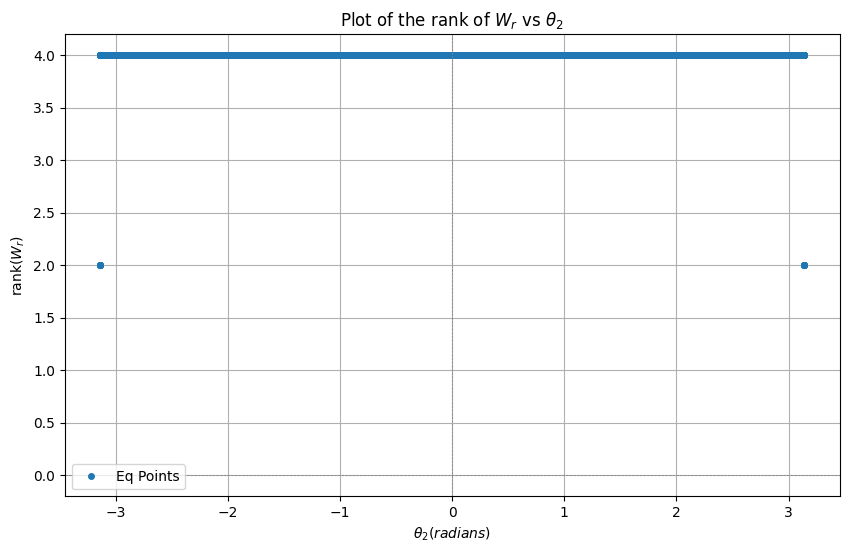

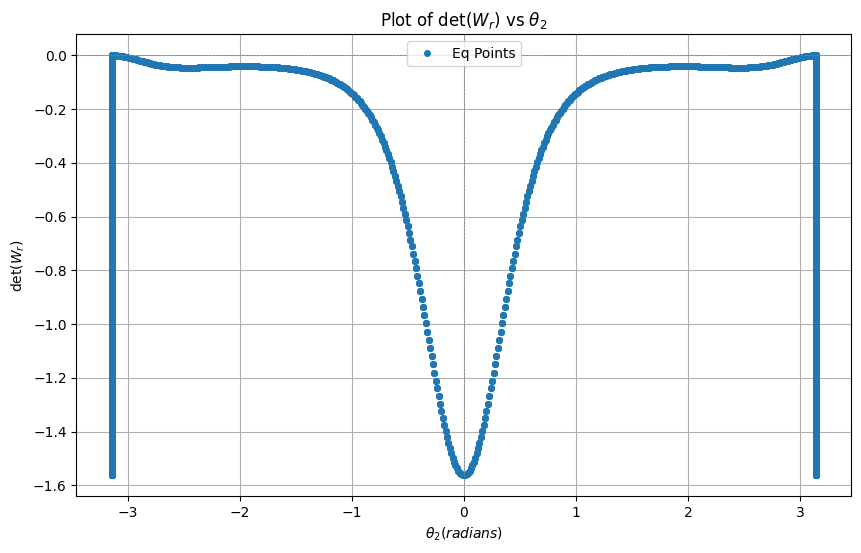

In [ ]:
print(det_vals)
print(rank_vals)

rank_vals_np = np.array(rank_vals)
plt.figure(figsize=(10, 6))
plt.plot(theta2_eq, rank_vals_np, 'o', markersize=4, label='Eq Points')
plt.title('Plot of the rank of $W_r$ vs $θ_{2}$')
plt.xlabel("$θ_{2} (radians)$")
plt.ylabel("rank($W_r$)")
plt.axhline(0, color='gray', lw=0.5, linestyle='--')
plt.axvline(0, color='gray', lw=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

det_vals_np = np.array(det_vals)
plt.figure(figsize=(10, 6))
plt.plot(theta2_eq, det_vals_np, 'o', markersize=4, label='Eq Points')
plt.title('Plot of det($W_r$) vs $θ_{2}$')
plt.xlabel("$θ_{2} (radians)$")
plt.ylabel("det($W_r$)")
plt.axhline(0, color='gray', lw=0.5, linestyle='--')
plt.axvline(0, color='gray', lw=0.5, linestyle='--')
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Part E
# for setting time,want to be 95% away from our intial condition
# greater the magnitude in Re(lambda), the less the settling time is
#
from scipy.signal import place_poles

# we get A and B As we did in part C

point = {'theta1' : 0, 'theta2': 0, 'dtheta1':0, 'dtheta2': 0}
J_eval = J_f.subs(point)

control = sp.Matrix([0, 1])
g_x = M.inv() * control
g_x = g_x.row_insert(0, sp.Matrix([[0]]))
g_x = g_x.row_insert(0, sp.Matrix([[0]]))
g_eval = g_x.subs(point)

A = np.array(J_eval).astype(np.float64)
B = np.array(g_eval).astype(np.float64)
print("A = {}".format(A))
print("B = {}".format(B))

# pole placement
desired_poles = [-14.1, -3, -4, -6]
result = place_poles(A, B, desired_poles)
K = result.gain_matrix

print("Feedback Gain K:", K)


A = [[  0.   0.   1.   0.]
 [  0.   0.   0.   1.]
 [ 20. -20.   0.   0.]
 [-20.  40.   0.   0.]]
B = [[ 0.  ]
 [ 0.  ]
 [-0.75]
 [ 1.25]]
Feedback Gain K: [[-2993.6  -1558.32 -1050.2   -608.44]]


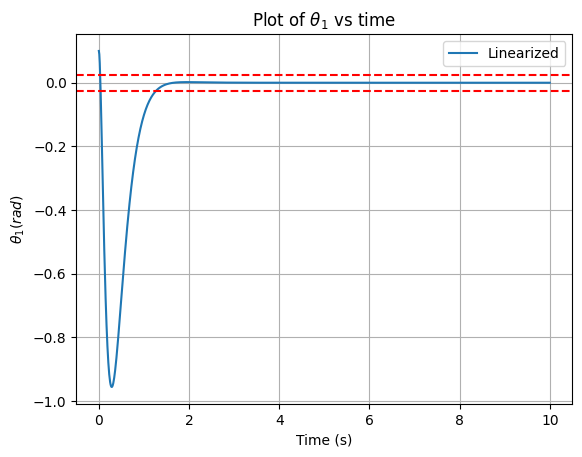

Final theta1: -1.668875075420538e-11
Final theta2: 1.1792424779490095e-11


In [ ]:
from scipy.integrate import odeint

def linearized_dynamics(x, t):
    dxdt = np.dot(A - np.dot(B, K), x)  # Replace with your control input logic
    return dxdt

xi = [0.1, 0, 0, 0]
t = np.linspace(0, 10, 1000)

solution = odeint(linearized_dynamics, xi, t)
theta1 = solution[:, 0]
theta2 = solution[:, 1]

# Plot results
plt.figure()
plt.plot(t, theta1, label='Linearized')
#plt.plot(t, theta2, label='theta2 (rad)')
plt.axhline(0.025, color='red', linestyle='--')
plt.axhline(-0.025, color='red', linestyle='--')
plt.title('Plot of $θ_1$ vs time')
plt.xlabel('Time (s)')
plt.ylabel('$θ_1 (rad)$')
plt.legend()
plt.grid()
plt.show()

# Final value after simulation
y_final_theta1 = theta1[-1]
y_final_theta2 = theta2[-1]
print("Final theta1:", y_final_theta1)
print("Final theta2:", y_final_theta2)

In [ ]:
linear_theta1 = theta1

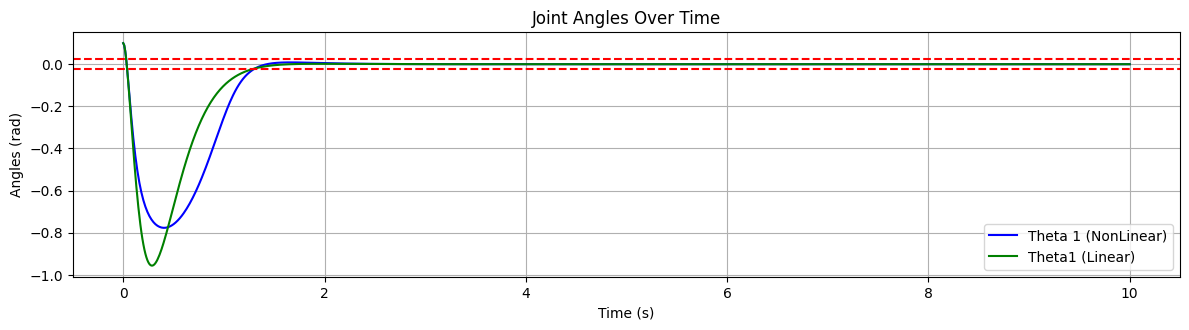

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Functions to compute Matrices given the value for theta and theta_dor
def M(theta):
    theta1, theta2 = theta
    return np.array([[a + b + 2 * c * np.cos(theta2), b + c * np.cos(theta2)],
                     [b + c * np.cos(theta2), b]])
def C(theta, theta_dot):
    theta1, theta2 = theta
    dtheta1, dtheta2 = theta_dot
    return np.array([[-c * np.sin(theta2) * dtheta2, -c * np.sin(theta2) * (dtheta1 + dtheta2)],
                     [c * np.sin(theta2) * dtheta1, 0]])
def G(theta):
    theta1, theta2 = theta
    return np.array([[-d * np.sin(theta1) - e * np.sin(theta1 + theta2)],
                     [-e * np.sin(theta1 + theta2)]])

def nonlinear_dynamics(x, t):
    theta1, theta2, dtheta1, dtheta2 = x
    theta = np.array([theta1, theta2])
    theta_dot = np.array([dtheta1, dtheta2])

    u = -K @ np.array([theta1, theta2, dtheta1, dtheta2])
    u_vec = np.array([[0], [u[0]]])

    M_inv = np.linalg.inv(M(theta))
    C_eval = C(theta, theta_dot)
    G_eval = G(theta)

    theta_dot = np.array([[dtheta1], [dtheta2]])
    theta_ddot = M_inv @ (u_vec - C_eval @ theta_dot - G_eval)

    return [dtheta1, dtheta2, theta_ddot[0][0], theta_ddot[1][0]]


# intial condition
x0 = [0.1, 0, 0, 0]
t = np.linspace(0, 10, 1000)
solution = odeint(nonlinear_dynamics, x0, t)

# Extract angles and angular velocities
theta1 = solution[:, 0]
theta2 = solution[:, 1]
dot_theta1 = solution[:, 2]
dot_theta2 = solution[:, 3]

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, theta1, label='Theta 1 (NonLinear)', color='blue')
plt.plot(t, linear_theta1, label='Theta1 (Linear)', color='green')
plt.axhline(0.025, color='red', linestyle='--')
plt.axhline(-0.025, color='red', linestyle='--')
plt.title('Joint Angles Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Angles (rad)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()